In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_excel("/kaggle/input/aircraft-sensor-and-engine-performance/Dataset/PM_train.xlsx")

In [65]:
df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  int64  
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [67]:
df_truth = pd.read_excel("/kaggle/input/aircraft-sensor-and-engine-performance/Dataset/PM_truth.xlsx")

In [68]:
df_truth.head()

,more,id
0,98,1
1,69,2
2,82,3
3,91,4
4,93,5


In [69]:
np.unique(df['id'],return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]),
 array([192, 287, 179, 189, 269, 188, 259, 150, 201, 222, 240, 170, 163,
        180, 207, 209, 276, 195, 158, 234, 195, 202, 168, 147, 230, 199,
        156, 165, 163, 194, 234, 191, 200, 195, 181, 158, 170, 194, 128,
        188, 216, 196, 207, 192, 158, 256, 214, 231, 215, 198, 213, 213,
        195, 257, 193, 275, 137, 147, 231, 172, 185, 180, 174, 283, 153,
        202, 313, 199, 362, 137, 208, 213, 213, 166, 229, 210, 154, 2

In [70]:
df_truth[df_truth['id']==99]

,more,id
98,20,99


In [71]:
max_cycle_per_engine = df.groupby('id')['cycle'].max().reset_index()
max_cycle_per_engine.columns = ['id', 'max_cycle']

In [72]:
df_merged = pd.merge(max_cycle_per_engine, df_truth, on='id')

In [73]:
df_merged['failure_cycle'] = df_merged['max_cycle'] + df_merged['more']

In [74]:
df = pd.merge(df, df_merged[['id', 'failure_cycle']], on='id')

In [75]:
df['remaining_cycles'] = df['failure_cycle'] - df['cycle']

In [76]:
df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,failure_cycle,remaining_cycles
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,290,289
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,290,288
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,290,287
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,290,286
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,290,285


In [77]:
df[df['id'] == 99][['id', 'cycle', 'remaining_cycles', 'failure_cycle']]

,id,cycle,remaining_cycles,failure_cycle
20246,99,1,204,205
20247,99,2,203,205
20248,99,3,202,205
20249,99,4,201,205
20250,99,5,200,205
...,...,...,...,...
20426,99,181,24,205
20427,99,182,23,205
20428,99,183,22,205
20429,99,184,21,205


In [78]:
df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,failure_cycle,remaining_cycles
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,290,289
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,290,288
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,290,287
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,290,286
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,290,285


## Given an engine ID, the cycle, settings 1-3 and s1-s21 sensor data, predict the failure cycle of the engine

In [79]:
df_test = pd.read_excel("/kaggle/input/aircraft-sensor-and-engine-performance/Dataset/PM_test.xlsx")

In [80]:
df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,521.720000,2388.030000,8125.550000,8.40520,0.03,392.000000,2388,100,38.860000,23.373500
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,522.160000,2388.060000,8139.620000,8.38030,0.03,393.000000,2388,100,39.020000,23.391600
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,521.970000,2388.030000,8130.100000,8.44410,0.03,393.000000,2388,100,39.080000,23.416600
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,521.380000,2388.050000,8132.900000,8.39170,0.03,391.000000,2388,100,39.000000,23.373700
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,522.150000,2388.030000,8129.540000,8.40310,0.03,390.000000,2388,100,38.990000,23.413000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,92,102,0.0045,-0.0003,100,518.67,642.86,1588.09,1415.99,14.62,...,521.140000,2388.140000,8125.230000,8.43830,0.03,395.000000,2388,100,38.880000,23.266900
11935,92,103,0.0017,0.0001,100,518.67,643.18,1589.53,1411.04,14.62,...,520.650000,2388.170000,8123.800000,8.46210,0.03,394.000000,2388,100,38.780000,23.165200
11936,92,104,0.0022,0.0001,100,518.67,642.67,1585.19,1413.07,14.62,...,521.190000,2388.190000,8120.470000,8.47990,0.03,395.000000,2388,100,38.570000,23.176400
11937,92,105,0.0016,0.0001,100,518.67,642.69,1588.70,1409.71,14.62,...,521.400000,2388.160000,8124.380000,8.44090,0.03,394.000000,2388,100,38.930000,23.272600


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20431 entries, 0 to 20430
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20431 non-null  int64  
 1   cycle             20431 non-null  int64  
 2   setting1          20431 non-null  float64
 3   setting2          20431 non-null  float64
 4   setting3          20431 non-null  int64  
 5   s1                20431 non-null  float64
 6   s2                20431 non-null  float64
 7   s3                20431 non-null  float64
 8   s4                20431 non-null  float64
 9   s5                20431 non-null  float64
 10  s6                20431 non-null  float64
 11  s7                20431 non-null  float64
 12  s8                20431 non-null  float64
 13  s9                20431 non-null  float64
 14  s10               20431 non-null  float64
 15  s11               20431 non-null  float64
 16  s12               20431 non-null  float6

In [82]:
df = df.drop('remaining_cycles',axis=1)

<Axes: >

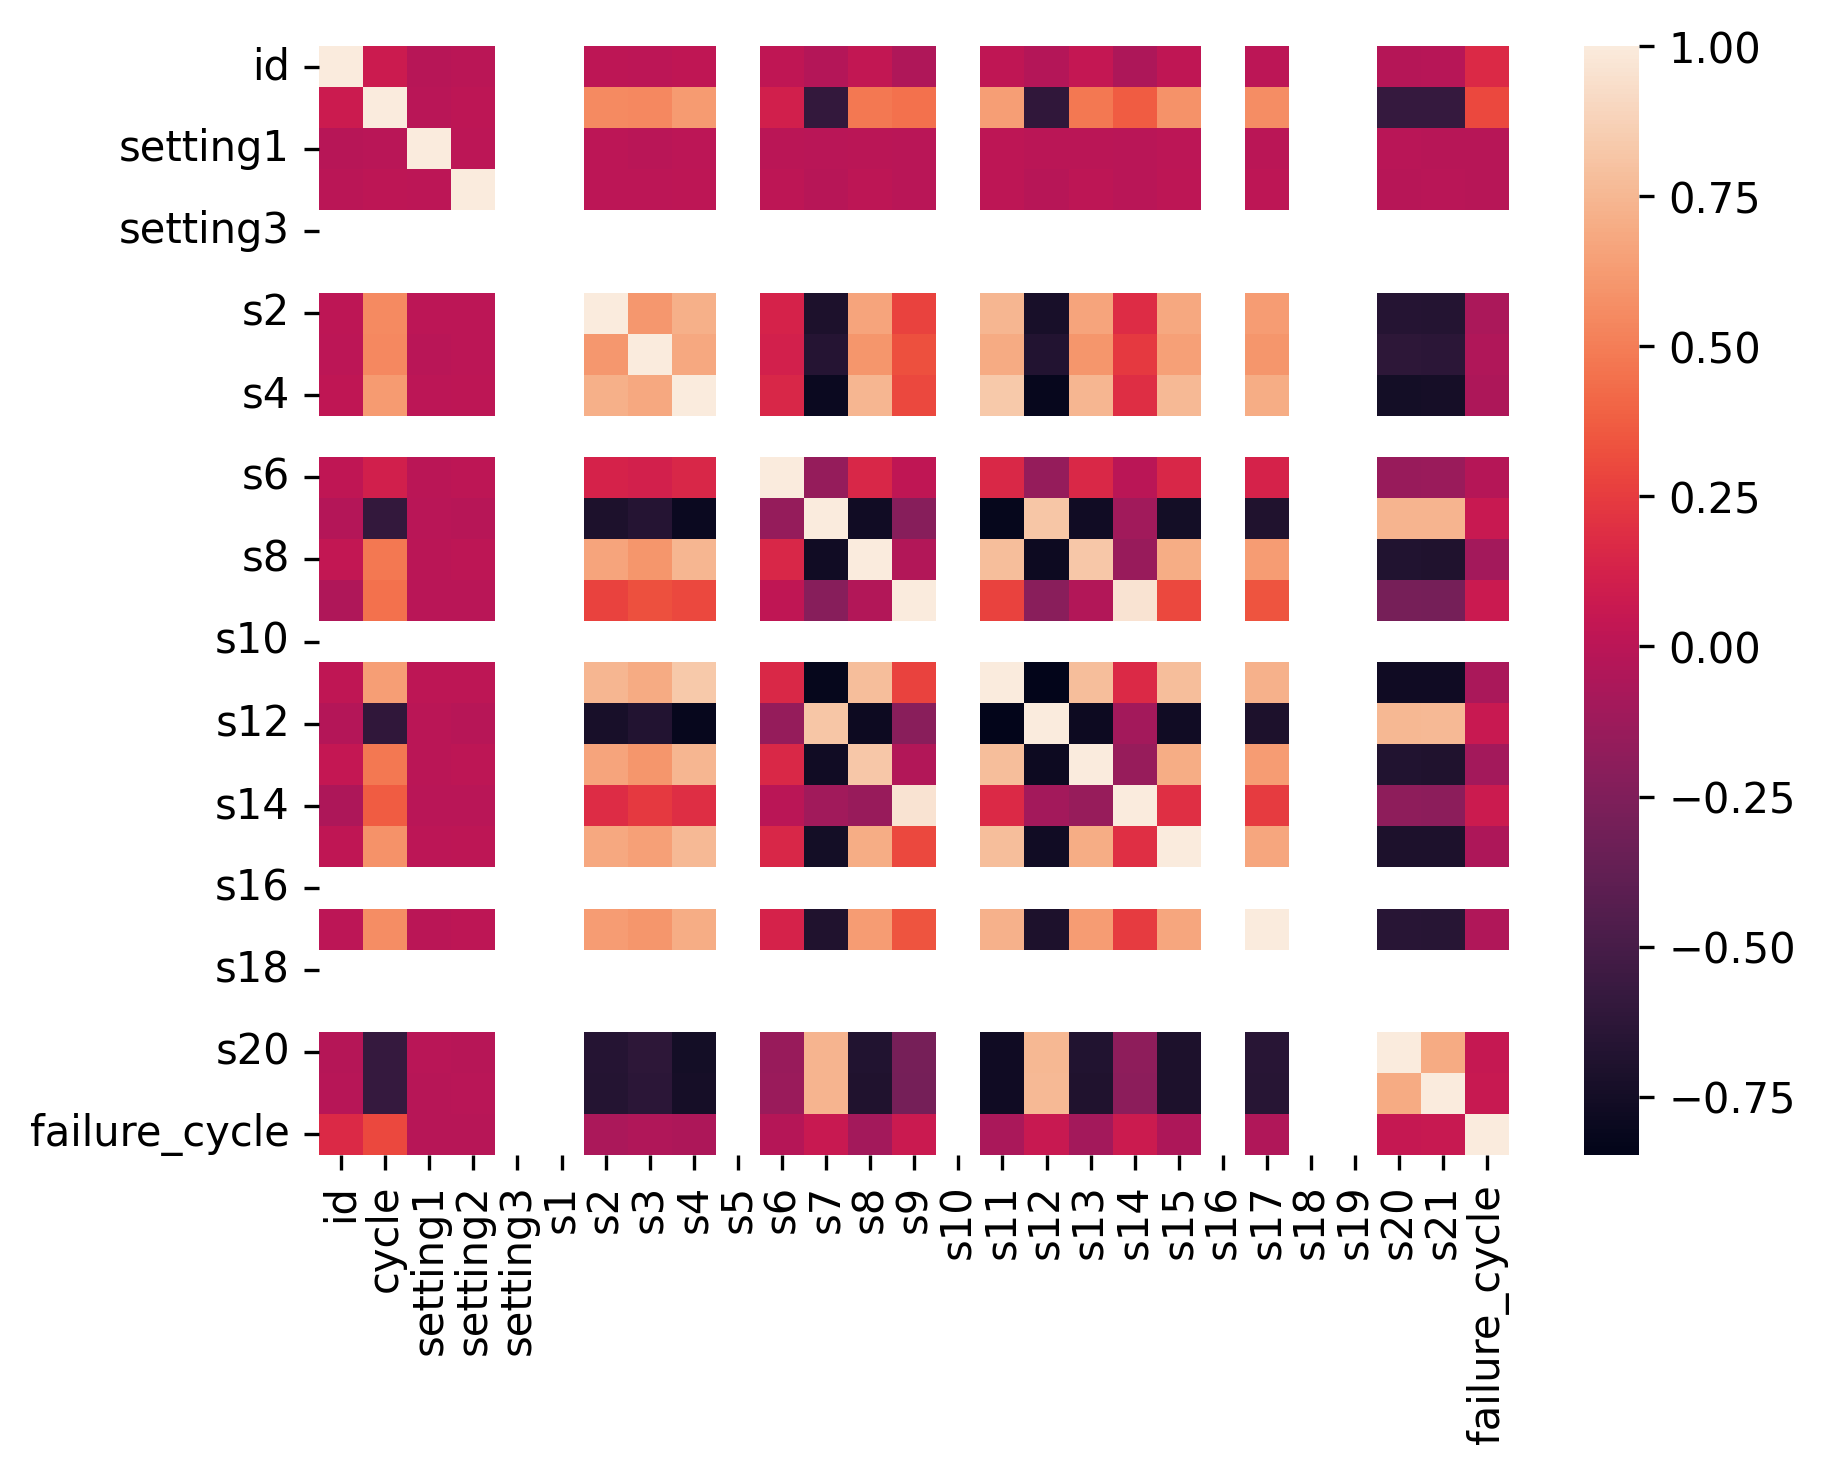

In [83]:
plt.figure(dpi=300)
sns.heatmap(df.corr())

In [84]:
df.corr()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,failure_cycle
id,1.000000,0.082108,-0.017175,-0.001325,NaN,NaN,0.012393,0.009780,0.024136,NaN,...,0.042211,-0.059318,0.020355,NaN,0.009974,NaN,NaN,-0.017806,-0.013645,0.164390
cycle,0.082108,1.000000,-0.004338,0.015810,NaN,NaN,0.549071,0.543389,0.623502,NaN,...,0.475660,0.371685,0.587842,NaN,0.566617,NaN,NaN,-0.582738,-0.585333,0.294009
setting1,-0.017175,-0.004338,1.000000,0.010470,NaN,NaN,0.009435,-0.005466,0.009959,NaN,...,0.002494,-0.004588,0.007780,NaN,0.002661,NaN,NaN,-0.006524,-0.014811,-0.011645
setting2,-0.001325,0.015810,0.010470,1.000000,NaN,NaN,0.007269,0.009402,0.014382,NaN,...,0.018440,-0.006510,0.014237,NaN,0.013167,NaN,NaN,-0.010840,-0.007886,-0.012217
setting3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s2,0.012393,0.549071,0.009435,0.007269,NaN,NaN,1.000000,0.603260,0.715807,NaN,...,0.662062,0.180692,0.677036,NaN,0.630869,NaN,NaN,-0.662025,-0.668947,-0.066156
s3,0.009780,0.543389,-0.005466,0.009402,NaN,NaN,0.603260,1.000000,0.678800,NaN,...,0.600468,0.238336,0.640372,NaN,0.600294,NaN,NaN,-0.626195,-0.634592,-0.042873
s4,0.024136,0.623502,0.009959,0.014382,NaN,NaN,0.715807,0.678800,1.000000,NaN,...,0.744850,0.191851,0.758747,NaN,0.704029,NaN,NaN,-0.748136,-0.745908,-0.060127
s5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
engine_ids = df['id'].unique()
engine_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [86]:
from sklearn.model_selection import train_test_split
train_ids, test_ids = train_test_split(engine_ids, test_size=0.2, random_state=0)

In [87]:
train_df = df[df['id'].isin(train_ids)]
test_df = df[df['id'].isin(test_ids)]

In [88]:
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,failure_cycle
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,290
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,290
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,290
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,290
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,290


In [89]:
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,failure_cycle
479,3,1,0.0008,0.0005,100,518.67,642.04,1584.20,1398.13,14.62,...,2388.00,8138.40,8.4207,0.03,391,2388,100,38.96,23.3205,261
480,3,2,-0.0010,0.0000,100,518.67,642.66,1587.04,1398.62,14.62,...,2388.01,8137.38,8.3949,0.03,390,2388,100,39.07,23.4369,261
481,3,3,0.0013,-0.0002,100,518.67,642.07,1580.75,1401.10,14.62,...,2388.01,8137.20,8.3820,0.03,393,2388,100,39.03,23.3162,261
482,3,4,0.0008,-0.0002,100,518.67,642.50,1580.12,1395.76,14.62,...,2388.07,8139.35,8.3940,0.03,391,2388,100,38.94,23.4901,261
483,3,5,0.0020,0.0004,100,518.67,641.97,1581.48,1394.05,14.62,...,2388.03,8135.99,8.4233,0.03,391,2388,100,38.90,23.4190,261


In [90]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
x = train_df.drop('failure_cycle',axis=1)
y = train_df['failure_cycle']

In [91]:
rfr.fit(x,y)

RandomForestRegressor()

In [92]:
xt = test_df.drop('failure_cycle',axis=1)

In [93]:
yt = rfr.predict(xt)

In [94]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(yt,test_df['failure_cycle'])

### Random FOrest RMSE: 98.7

In [95]:
print(mae)

69.8410766682442


In [96]:
rmse = np.sqrt(mean_squared_error(yt,test_df['failure_cycle']))
print(rmse)

98.71918027905842


In [97]:
importances = rfr.feature_importances_

In [98]:
xt.columns

Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21'],
      dtype='object')

In [99]:
indices = np.argsort(importances)

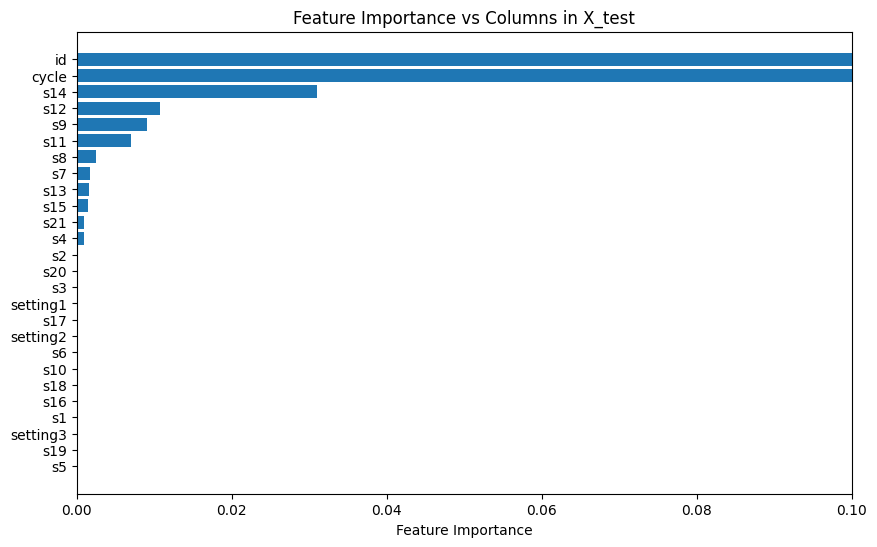

In [100]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [xt.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance vs Columns in X_test')
plt.xlim((0,0.1))
plt.show()


In [101]:
df_aggregated = train_df.groupby('id').agg(['mean', 'std', 'min', 'max'])
df_aggregated.columns = ['_'.join(col) for col in df_aggregated.columns]

# Merge aggregated features back with original dataset
df = pd.merge(df, df_aggregated, on='id', how='left')

In [102]:
df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s20_min,s20_max,s21_mean,s21_std,s21_min,s21_max,failure_cycle_mean,failure_cycle_std,failure_cycle_min,failure_cycle_max
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,38.34,39.18,23.30631,0.105101,22.9588,23.4999,290.0,0.0,290.0,290.0
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,38.34,39.18,23.30631,0.105101,22.9588,23.4999,290.0,0.0,290.0,290.0
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,38.34,39.18,23.30631,0.105101,22.9588,23.4999,290.0,0.0,290.0,290.0
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,38.34,39.18,23.30631,0.105101,22.9588,23.4999,290.0,0.0,290.0,290.0
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,38.34,39.18,23.30631,0.105101,22.9588,23.4999,290.0,0.0,290.0,290.0


In [103]:
from sklearn.linear_model import Ridge

# Train Ridge regression model with regularization (L2)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x, y)

# Predictions
ridge_predictions = ridge_model.predict(xt)

rmse = np.sqrt(mean_squared_error(ridge_predictions,test_df['failure_cycle']))
print(rmse)

61.28955983681006


In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(ridge_predictions,test_df['failure_cycle'])
print(mae)

49.69096875984464


### Ridge Regression RMSE: 61.2

In [105]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(x,y)

# Predictions
xgb_predictions = xgb_model.predict(xt)
mae = mean_absolute_error(xgb_predictions,test_df['failure_cycle'])
print(mae)

56.395052699076864


In [106]:
rmse = np.sqrt(mean_squared_error(xgb_predictions,test_df['failure_cycle']))
print(rmse)

76.02028403776544


In [107]:
importances = xgb_model.feature_importances_

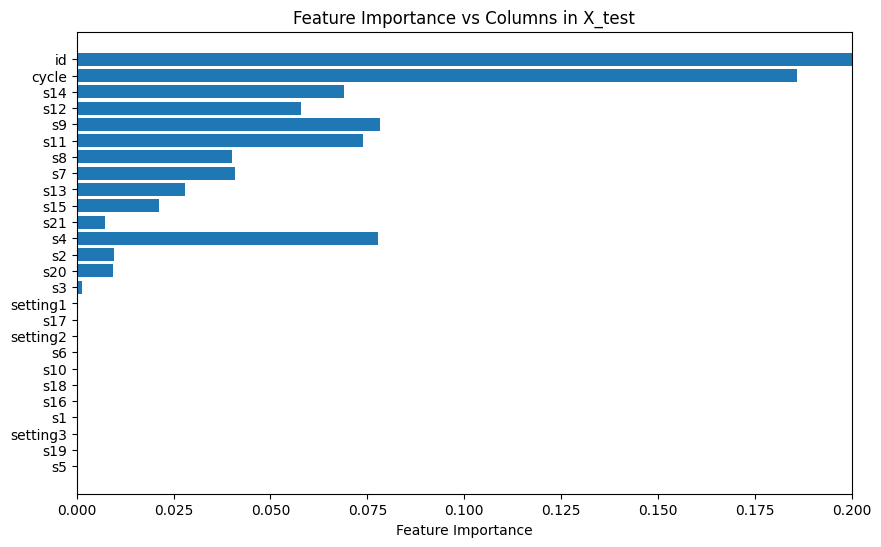

In [108]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [xt.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance vs Columns in X_test')
plt.xlim((0,0.2))
plt.show()

In [109]:
importances

array([2.9976740e-01, 1.8588218e-01, 2.8656314e-05, 1.0064792e-04,
       0.0000000e+00, 0.0000000e+00, 9.5024789e-03, 1.3415018e-03,
       7.7677138e-02, 0.0000000e+00, 0.0000000e+00, 4.0781572e-02,
       4.0163875e-02, 7.8329474e-02, 0.0000000e+00, 7.3956691e-02,
       5.7873312e-02, 2.7857913e-02, 6.9013014e-02, 2.1139033e-02,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       9.3406560e-03, 7.2445325e-03], dtype=float32)

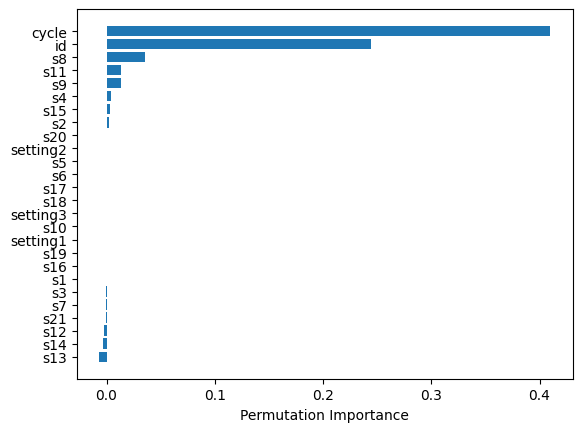

In [110]:
from sklearn.inspection import permutation_importance

result = permutation_importance(xgb_model, xt, test_df['failure_cycle'], n_repeats=10, random_state=0)
sorted_importances_idx = result.importances_mean.argsort()

# Plot the feature importance
plt.barh(xt.columns[sorted_importances_idx], result.importances_mean[sorted_importances_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [111]:
from sklearn.svm import SVR
model = SVR()
model.fit(x,y)
yt = model.predict(xt)
rmse = np.sqrt(mean_squared_error(yt,test_df['failure_cycle']))
print(rmse)

74.27956006681306


### SVR RMSE: 74.2